# Mòdul 5 - Exercicis

## Part 1 - Exercicis per practicar amb regressions.

### Exercici 1: Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
with open('housing data description.txt', 'r') as file:
    contingut = file.read()
# Mostra el cotingut en format raw, sense salts de línia. 
contingut

'1. Title: Boston Housing Data\n\n2. Sources:\n   (a) Origin:  This dataset was taken from the StatLib library which is\n                maintained at Carnegie Mellon University.\n   (b) Creator:  Harrison, D. and Rubinfeld, D.L. \'Hedonic prices and the \n                 demand for clean air\', J. Environ. Economics & Management,\n                 vol.5, 81-102, 1978.\n   (c) Date: July 7, 1993\n\n3. Past Usage:\n   -   Used in Belsley, Kuh & Welsch, \'Regression diagnostics ...\', Wiley, \n       1980.   N.B. Various transformations are used in the table on\n       pages 244-261.\n    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.\n       In Proceedings on the Tenth International Conference of Machine \n       Learning, 236-243, University of Massachusetts, Amherst. Morgan\n       Kaufmann.\n\n4. Relevant Information:\n\n   Concerns housing values in suburbs of Boston.\n\n5. Number of Instances: 506\n\n6. Number of Attributes: 13 continuous attributes (incl

In [90]:
# Amb la funció print() ens mostra el text amb els salts de línia d'un mode més fàcil d'interpretar
print (contingut)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [91]:
# D'acord a la descripció encapçalem cada columna amb una nom que identifiqui el tipus de data
df = pd.read_csv('housing data.csv', header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX' , 'RM' , 
                                                         'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [92]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [93]:
# df.info () Ens mostra el tipus de data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [94]:
# df.nunique() ens mostra el nombre d'elements diferents d'un eix, per defecte, columnes (axis=1)
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [95]:
# En aquest cas comprobem els elements diferent que apareixen en les columnes CHAS i RAD, que són on apareixen menys.
# CHAS -> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
df.CHAS.unique()

array([0, 1], dtype=int64)

In [96]:
# RAD -> index of accessibility to radial highways
df.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [97]:
# Per saber quantes entrades hi ha de cada element diferent, fem servir la propietat value_counts()
df.CHAS.value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [98]:
# .count() simplement compta el nombre de entrades amb valor no null.
df.CHAS.count()

506

In [99]:
df.RAD.value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [100]:
df.RAD.count()

506

In [101]:
# df.describe() genera estadístiques descriptives
# La propietat T s'utilitza per a transposar l'índex i les columnes del marc de dades
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [102]:
# df.isnull() ens mostra el nombre de entrades amb valors nuls, en aquest cas veiem que no hi ha cap valor.
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [103]:
# isnull(). sum() retorna el nombre de valors que manquen al conjunt de dades per cada columna. En aquest cas no hi han.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [104]:
# Comprovem si hi ha dades duplicades en el dataset
df.duplicated().sum()

0

In [105]:
# Identifiquem les variables CHAS y RAD com a categóriques perquè sols prenen un nombre limitat de valors.

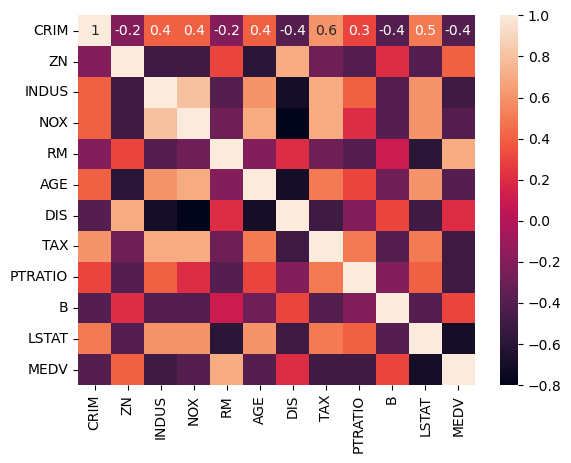

In [106]:
# Un mapa de calor és una tècnica de visualització de dades bidimensional que representa la magnitud dels valors individuals
# dins d'un conjunt de dades com a color. 
# La variació de color pot ser per to o intensitat. 

sns.heatmap(df.drop(['CHAS', 'RAD'], axis = 1).corr().round(1), annot=True);

### Iniciem el preprocessat de les dades

#### NUMÈRIQUES

In [107]:
df_stand = df.copy()

In [108]:
# importem la llibreria scypy per fer càlculs estadístics avançants
import scipy as sp
# Realitzem el test de Shapiro-Wilk per a la normalitat amb les variables numèriques
# El test de Shapiro-Wilk prova la hipòtesi nul·la que les dades es van extreure d'una distribució normal.
from scipy.stats import shapiro

In [109]:
gauss = []
no_gauss = []

for name in df_stand.drop(['CHAS', 'RAD', 'MEDV'], axis = 1):
    stat, p = shapiro(df_stand[name])
    if p > 0.05:
        gauss.append(name)
    else:
        no_gauss.append(name)

gauss
no_gauss

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

##### Parametres 
- Normals -> StandardScaler
- No Normals
    - Outliers -> RobustScaler
    - No Outliers -> MinMaxScaler

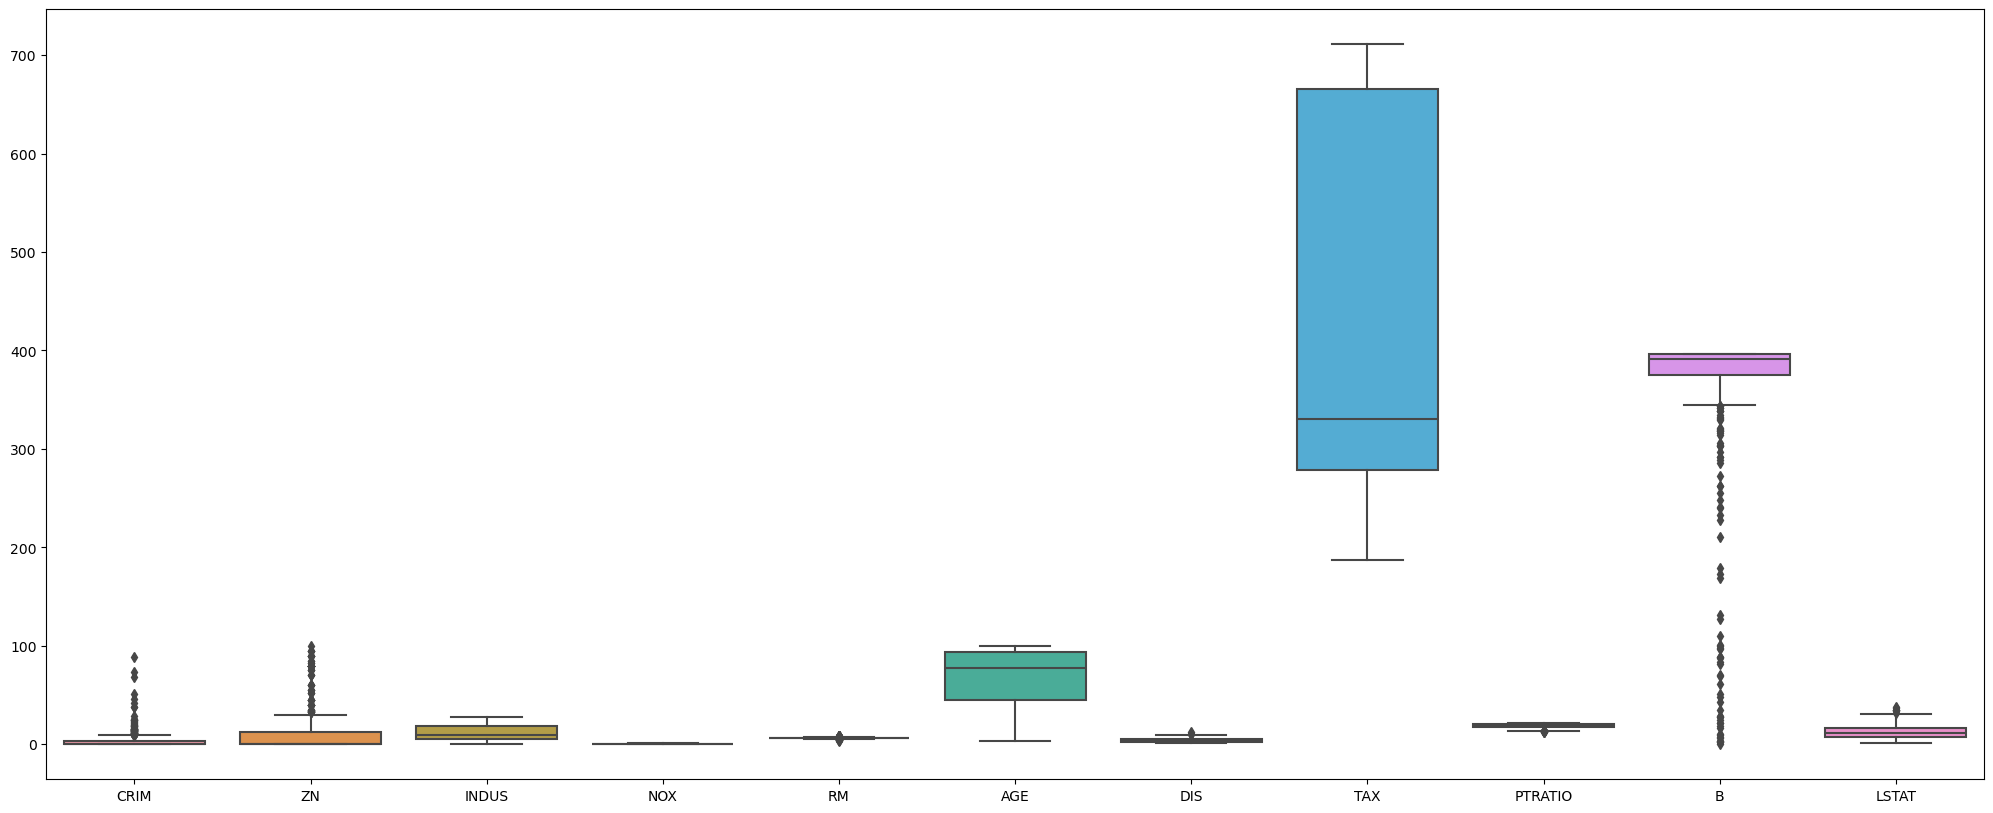

In [110]:
# Un diagrama de caixa (també, diagrama de caixa i bigotis o box plot) és un mètode estandarditzat per a representar gràficament
# una sèrie de dades numèriques a través dels seus quartils. 
# D'aquesta manera, es mostren a simple vista la mitjana i els quartils de les dades,​ i també poden representar-se els seus valors atípics.

plt.figure(figsize=(25,10))
sns.boxplot(data=df_stand.drop(['CHAS', 'RAD', 'MEDV'], axis = 1));

In [111]:
outlier = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
no_outlier = ['INDUS', 'NOX', 'AGE', 'TAX']

In [112]:
# Importem RogustScaler i MinMaxScaler de sklearn.preprocessing 
# RobustScaler aplica un escalat a les característiques de manera que sigui més robust als valors atípics o outliers.
# MinMaxScaler transforma les característiques escalant-les a un rang donat, per defecte (0,1), encara que pot ser personalitzat

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [113]:
df_stand.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [114]:
rs = RobustScaler()
mms = MinMaxScaler()

df_stand[outlier] = rs.fit_transform(df_stand[outlier])
df_stand[no_outlier] = mms.fit_transform(df_stand[no_outlier])

In [115]:
df_stand.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,1,0.208015,-1.339286,0.261902,-0.637681,24.0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,2,0.104962,-0.446429,0.261902,-0.221889,21.6
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,2,0.104962,-0.446429,0.066675,-0.732634,34.7
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,3,0.066794,-0.125000,0.153016,-0.841579,33.4
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,3,0.066794,-0.125000,0.261902,-0.602699,36.2


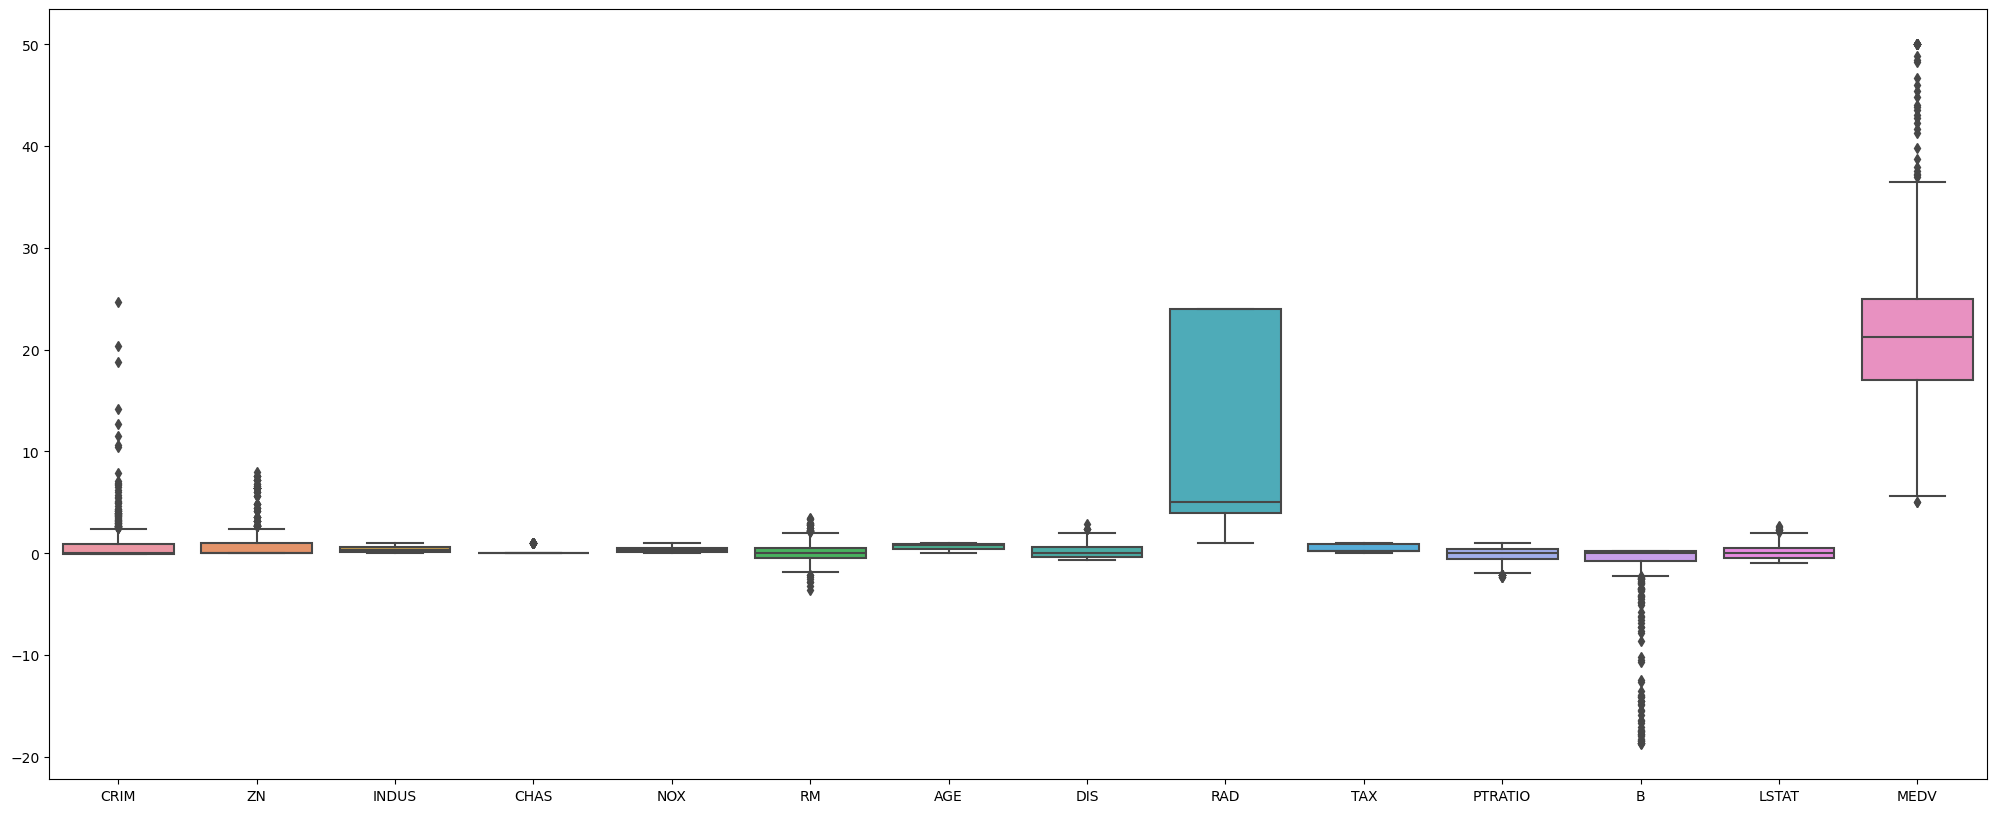

In [116]:
# Representem totes les variables exceptuant CHAS que te valors 0
plt.figure(figsize=(25,10))
sns.boxplot(df_stand);

#### CATEGÒRIQUES (QUALITATIVES)

In [117]:
# Identifiquem els 9 valors únics que corresponent a la variable categòrica RAD
df_stand.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [118]:
# La funció get_dummies s'utilitza per convertir variables categòriques en variables fictícies o indicadores.
# Generem un nou dataset on identifiquem en columnes els valors únics de RAD i a les files en quin registre 
# apareix cadascun mitjançant un booleà (True, False). 
pd.get_dummies(df_stand['RAD'], prefix = 'RAD_')

,RAD__1,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
0,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
501,True,False,False,False,False,False,False,False,False
502,True,False,False,False,False,False,False,False,False
503,True,False,False,False,False,False,False,False,False
504,True,False,False,False,False,False,False,False,False


In [119]:
# Identifiquem els 2 valors únics que corresponent a la variable categòrica CHAS
df_stand.CHAS.unique()

array([0, 1], dtype=int64)

In [120]:
# Representem amb un booleà els valors de la variable CHAS de cada entrada
pd.get_dummies(df_stand['CHAS'], prefix = 'CHAS_')

,CHAS__0,CHAS__1
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
501,True,False
502,True,False
503,True,False
504,True,False


In [121]:
# Podem en tots dos casos representar els valors boleans per 0 (False) i 1 (True)
# RAD
pd.get_dummies(df_stand['RAD'], prefix = 'RAD_')*1

,RAD__1,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
501,1,0,0,0,0,0,0,0,0
502,1,0,0,0,0,0,0,0,0
503,1,0,0,0,0,0,0,0,0
504,1,0,0,0,0,0,0,0,0


In [122]:
# CHAS
pd.get_dummies(df_stand['CHAS'], prefix = 'CHAS_')*1

,CHAS__0,CHAS__1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
501,1,0
502,1,0
503,1,0
504,1,0


In [123]:
# Eliminem la primera columna en tots dos casos
# RAD
pd.get_dummies(df_stand['RAD'], prefix = 'RAD_', drop_first = True)*1

,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0
504,0,0,0,0,0,0,0,0


In [124]:
# CHAS
pd.get_dummies(df_stand['CHAS'], prefix = 'CHAS_', drop_first = True)*1

,CHAS__1
0,0
1,0
2,0
3,0
4,0
...,...
501,0
502,0
503,0
504,0


In [125]:
# Concatenem (unim) per files (axis = 1) el dataframe df_stand, on hem eliminat la columna RAD 
# i el dataframe pd.get_dummies(df_stand['RAD']) extraient la primera columna RAD_1

df_stand = pd.concat([df_stand.drop('RAD', axis= 1), pd.get_dummies(df_stand['RAD'], prefix = 'RAD_', drop_first = True)])
df_stand

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
0,-0.069593,1.44,0.067815,0.0,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,...,-0.637681,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.063755,0.00,0.242302,0.0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,...,-0.221889,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.063760,0.00,0.242302,0.0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,...,-0.732634,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.062347,0.00,0.063050,0.0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,...,-0.841579,33.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.052144,0.00,0.063050,0.0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,...,-0.602699,36.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,False,False


In [126]:
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
 13  RAD__2   506 non-null    object 
 14  RAD__3   506 non-null    object 
 15  RAD__4   506 non-null    object 
 16  RAD__5   506 non-null    object 
 17  RAD__6   506 non-null    object 
 18  RAD__7   506 non-null    object 
 19  RAD__8   506 non-null    object 
 20  RAD__24  506 non-null    object 
dtypes: float64(13), obje

In [127]:
# El mètode copy() retorna una còpia del DataFrame.
# Per defecte, la còpia és una "còpia profunda", 
# el que significa que qualsevol canvi realitzat en el DataFrame original NO es reflectirà en la còpia.
df_stand = df.copy()

In [128]:
# Definim un nou dataframe on hem eliminat la columna RAD_1 (simplifiquem)
dummies = pd.get_dummies(df_stand['RAD'], prefix = 'RAD_', drop_first = True)
dummies

,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
0,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False


In [129]:
# La concatenació ara queda restringida als nombre original de registres
df_stand = pd.concat([df_stand.drop('RAD', axis= 1), dummies], axis = 1)
df_stand

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,24.0,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,21.6,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,34.7,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,33.4,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,36.2,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,...,9.67,22.4,False,False,False,False,False,False,False,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,...,9.08,20.6,False,False,False,False,False,False,False,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,...,5.64,23.9,False,False,False,False,False,False,False,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,...,6.48,22.0,False,False,False,False,False,False,False,False


### Modelització 1: ENTRENAMENT - TEST - VALIDACIÓ

In [130]:
# Train_test_split és un procés de validació de models que ens permet comprovar com funcionaria el nostre model amb un nou conjunt de dades. 
# La divisió train-test-validació ajuda a avaluar com de bé es generalitzarà un model d'aprenentatge automàtic a dades noves i no vistes.
from sklearn.model_selection import train_test_split

In [131]:
# MEDV = Median value of owner-occupied homes in $1000's
# Generem dos dataframes X,y
X = df_stand.drop('MEDV', axis = 1)
y = df_stand['MEDV']

In [132]:
# Generem el mòdel. 
# El df es divideix en X_train, X_test, y_train i y_test. 
# Els conjunts X_train i y_train s'utilitzen per entrenar i ajustar el model. 
# Els conjunts X_test i y_test s'utilitzen per provar el model si prediu les sortides/etiquetes adequades. 
# Podem provar explícitament la mida del 'train' i els conjunts d'assaig.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [133]:
# Les matrius tenen un atribut anomenat shape que retorna una tupla 
# amb cada índex indicant el nombre d'elements corresponents.
X_train.shape

(404, 20)

In [134]:
X_test.shape

(102, 20)

In [135]:
y_train.shape

(404,)

In [136]:
y_test.shape

(102,)

In [137]:
# El dataframe corresonent a X_train veiem que mostra 404 files per 20 columnes
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
462,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,666.0,20.2,396.90,13.99,False,False,False,False,False,False,False,True
230,0.53700,0.0,6.20,0,0.504,5.981,68.1,3.6715,307.0,17.4,378.35,11.65,False,False,False,False,False,False,True,False
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,437.0,21.2,396.90,34.41,False,False,True,False,False,False,False,False
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,300.0,16.6,374.71,5.19,False,False,False,False,True,False,False,False
222,0.62356,0.0,6.20,1,0.507,6.879,77.7,3.2721,307.0,17.4,390.39,9.93,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,233.0,17.9,392.74,18.80,False,True,False,False,False,False,False,False
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,403.0,14.7,374.43,1.73,False,False,False,True,False,False,False,False
36,0.09744,0.0,5.96,0,0.499,5.841,61.4,3.3779,279.0,19.2,377.56,11.41,False,False,False,True,False,False,False,False
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,241.0,18.2,341.60,12.93,False,False,False,False,False,False,False,False


In [138]:
# El dataframe corresonent a y_train veiem que mostra tambe 404 files però sols una columna
y_train

462    19.5
230    24.3
141    14.4
243    23.7
222    27.5
       ... 
47     16.6
161    50.0
36     20.0
286    20.1
464    21.4
Name: MEDV, Length: 404, dtype: float64

In [139]:
# Matriu X_train (mostrem els 5 primers registres)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
462,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,666.0,20.2,396.90,13.99,False,False,False,False,False,False,False,True
230,0.53700,0.0,6.20,0,0.504,5.981,68.1,3.6715,307.0,17.4,378.35,11.65,False,False,False,False,False,False,True,False
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,437.0,21.2,396.90,34.41,False,False,True,False,False,False,False,False
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,300.0,16.6,374.71,5.19,False,False,False,False,True,False,False,False
222,0.62356,0.0,6.20,1,0.507,6.879,77.7,3.2721,307.0,17.4,390.39,9.93,False,False,False,False,False,False,True,False


In [140]:
# Executem el model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [141]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,224.0,14.7,392.78,3.81,False,False,True,False,False,False,False,False
441,9.72418,0.0,18.10,0,0.7400,6.406,97.2,2.0651,666.0,20.2,385.96,19.52,False,False,False,False,False,False,False,True
172,0.13914,0.0,4.05,0,0.5100,5.572,88.5,2.5961,296.0,16.6,396.90,14.69,False,False,False,True,False,False,False,False
95,0.12204,0.0,2.89,0,0.4450,6.625,57.8,3.4952,276.0,18.0,357.98,6.65,True,False,False,False,False,False,False,False
54,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,469.0,21.1,396.90,14.80,False,True,False,False,False,False,False,False


### Modelització 2: REGRESSIÓ LINEAL

#### La regressió lineal és un algoritme d'aprenentatge automàtic basat en l'aprenentatge supervisat. 
#### Realitza una tasca de regressió. La regressió modela un valor de predicció d'objectiu basat en variables independents. 
#### S'utilitza principalment per esbrinar la relació entre variables i previsió.

In [142]:
# La regressió lineal (LinearRegression) s'adapta a un model lineal amb coeficients w . (w1, ..., wp) per minimitzar 
# la suma residual de quadrats entre els objectius observats en el conjunt de dades,
# i els objectius predits per l'aproximació lineal.
from sklearn.linear_model import LinearRegression

In [143]:
# Definim el model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [144]:
# Mostra la taula concatenda X_test
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
410,51.13580,0.0,18.10,0,0.5970,5.757,100.0,1.4130,666.0,20.2,2.60,10.11,False,False,False,False,False,False,False,True
85,0.05735,0.0,4.49,0,0.4490,6.630,56.1,4.4377,247.0,18.5,392.30,6.53,False,True,False,False,False,False,False,False
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,216.0,14.9,387.31,3.76,False,False,False,True,False,False,False,False
422,12.04820,0.0,18.10,0,0.6140,5.648,87.6,1.9512,666.0,20.2,291.55,14.10,False,False,False,False,False,False,False,True
199,0.03150,95.0,1.47,0,0.4030,6.975,15.3,7.6534,402.0,17.0,396.90,4.56,False,True,False,False,False,False,False,False


In [145]:
# Mostra la taula concatenda y_test
y_test.head()

410    15.0
85     26.6
280    45.4
422    20.8
199    34.9
Name: MEDV, dtype: float64

### Diferents paràmetres per intentar millorar-ne la predicció (Exercici 3)

In [146]:
# La regressió de Ridge és una tècnica de regularització estadística
# La regressió de la cresta (Ridge) és un terme utilitzat per referir-se a un model de regressió lineal
# els coeficients del qual s'estimen no per quadrats mínims ordinaris (OLS), 
# sinó per un estimador, anomenat estimador de crestes, que, encara que esbiaixat, 
# té una variància menor que l'estimador OLS.

from sklearn.linear_model import Ridge

r_model = Ridge()
r_model.fit(X_train, y_train)
y_pred_r = r_model.predict(X_test)

In [147]:
# Matriu resultat de la predicció usant la regressió de cresta lineal
y_pred_r

array([15.54833845, 29.76689884, 37.89400385, 17.93699719, 33.80044533,
       37.27725711, 27.35173574,  9.9046923 , 13.55595547, 31.35632578,
       29.25333418, 18.36190946, 13.61153679, 31.04890781, 15.12140782,
       20.90732141, 18.89673078, 37.67294923, 18.23746903, 15.11306297,
       14.39243445, 23.95950447, 34.95258613, 37.64332529, 30.59851314,
       21.99067551, 17.88180625, 22.04479632, 22.8537224 , 19.90137477,
       25.49045543, 33.78551152, 15.26956635, 21.17475327, 23.28364525,
       34.68771482, 28.96946996, 18.57536515, 13.90843162, 39.16591866,
       31.06758   , 18.1523974 , 19.61843384, 39.51454492,  9.53824722,
       26.52407603, 19.66203906, 25.66826164, 15.47307241, 25.69250393,
       34.13598271, 26.19045709, 19.94571604, 12.51592772, 24.27191174,
       18.29869811, 11.42882968,  2.52879822, 31.00326165, 13.77013207,
       20.6845522 , 21.90855463, 21.30311297, 18.04263577, 23.8168375 ,
       24.40624551, 25.80578881, 21.44406295, 24.35335852, 30.42

In [148]:
# Els arbres de decisió (DTs) són un mètode d'aprenentatge supervisat no paramètric utilitzat per a la classificació i regressió. 
# L'objectiu és crear un model que predigui el valor d'una variable objectiu mitjançant l'aprenentatge de regles de decisió simples 
# inferides a partir de les característiques de les dades. 
# Els arbres de decisió en les regressions s'utilitzen per a ajustar-se a una corba sinusoidal amb l'addició de soroll. 

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [149]:
# Matriu resultat de la predicció usant la regressió basada en arbres de decissió
y_pred_dt

array([50. , 32.5, 48.5, 21.9, 31.2, 38.7, 20.5,  8.7, 22.5, 30.7, 24.7,
       18.7, 13.6, 23.4, 17.5, 26.4, 21.2, 39.8, 17.8, 14.1, 14.3, 50. ,
       23.6, 46.7, 50. , 23. , 13.5, 21.2, 17.1, 24.4, 29.9, 33.1, 10.4,
       20.7, 28.1, 36. , 22.9, 17.1, 15.2, 44.8, 28. , 16.5, 50. , 41.7,
       27.1, 23.5, 21. , 23.1, 18.1, 50. , 30.1, 36.2, 17.2, 11.3, 23.8,
       15.2, 14.6, 10.5, 32.7,  8.5, 19.5, 22. , 23.2, 20.6, 15.3, 21.9,
       22.9, 22.6, 20.9, 30.1, 20.1, 25. , 18.4, 25. , 18.3, 19.1, 11.9,
       20.3, 35.1, 13.1, 36.5,  8.3, 25. , 22.5, 22.5, 24.6, 17.8, 23.4,
       21.7, 30.1, 14.2, 36.4, 18.8, 24.7, 34.7, 35.1, 14.1, 35.1, 25. ,
       34.6, 21.7, 12.7])

In [150]:
# Un bosc aleatori és un metaestimador que s'adapta a una sèrie de regressors d'arbres de decisió 
# en diverses submostres del conjunt de dades i utilitza la mitjana per millorar la precisió predictiva i el control de l'ajust excessiu.

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [151]:
y_pred_rf

array([32.81 , 27.556, 47.939, 20.555, 31.631, 44.517, 23.342,  8.738,
       18.394, 30.763, 22.643, 19.863, 13.851, 25.407, 18.774, 21.009,
       20.308, 44.375, 19.316, 15.042, 15.721, 39.4  , 32.398, 46.366,
       41.96 , 22.374, 15.912, 20.322, 21.164, 21.369, 26.811, 32.395,
       17.003, 21.334, 23.046, 33.776, 24.383, 15.06 , 14.918, 45.786,
       31.077, 18.938, 34.667, 47.641, 18.306, 22.387, 19.807, 22.806,
       16.698, 33.426, 31.06 , 25.436, 19.527, 10.763, 21.491, 15.535,
       14.078,  9.09 , 34.273, 10.823, 19.864, 19.428, 17.324, 20.259,
       21.56 , 22.982, 23.153, 21.941, 22.606, 29.743, 19.684, 25.149,
       17.044, 25.708, 15.618, 18.857, 11.944, 19.637, 29.195, 11.656,
       32.47 ,  9.907, 24.015, 20.977, 19.16 , 22.466, 15.729, 20.25 ,
       20.854, 28.477, 12.741, 34.656, 19.839, 24.584, 33.879, 30.641,
       15.514, 29.157, 25.522, 33.787, 20.079, 14.284])

## AVALUACIÓ

### Exercici 2: Compara’ls en base al MSE i al R2.

In [152]:
# importem les funcions de càlcul estadistic MSE, R2 i MAE des de sklearn

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [153]:
# En estadística, l'error quadràtic mig, conegut també en anglès per Mean Squared Error, d'un estimador 
# mesura la mitjana dels errors al quadrat, és a dir, la diferència entre l'estimador i el que s'estima. 

mean_squared_error(y_test, y_pred_lr)

28.384789257246368

In [154]:
# R-quadrat (R2) és una mesura estadística que representa la proporció de la variància per a una variable dependent 
# que s'explica per una variable independent en un model de regressió.

r2_score(y_test, y_pred_lr)

0.6569223415797909

In [155]:
# L'error absolut mitjà (MAE) es defineix com la variància mitjana entre els valors significatius 
# en el conjunt de dades i els valors projectats en el mateix conjunt de dades.

mean_absolute_error(y_test, y_pred_lr)

3.6487549020065817

In [156]:
# Creem un diccionari on definim els diversos models de predicció generats abans
y_pred = {'RL': y_pred_lr, 'Ridge': y_pred_r, 'DT': y_pred_dt, 'RF': y_pred_rf}

In [157]:
# Apliquem els càlculs estadistics (MSE, MAE i R2) als diferents models de predicció generats abans

for name, y in y_pred.items():
    print(name)
    print(f'MSE: {mean_squared_error(y_test, y)}')
    print(f'MAE: {mean_absolute_error(y_test, y)}')
    print(f'R2: {r2_score(y_test, y)}')


RL
MSE: 28.384789257246368
MAE: 3.6487549020065817
R2: 0.6569223415797909
Ridge
MSE: 29.308162350653785
MAE: 3.6826238180072917
R2: 0.6457618331869526
DT
MSE: 48.22166666666668
MAE: 3.9460784313725497
R2: 0.41716049623668117
RF
MSE: 19.050979372549033
MAE: 2.46429411764706
R2: 0.7697370470320735


In [158]:
# Determinem les claus del diccionari amb els diferents models predictius emprats
y_pred.keys()

dict_keys(['RL', 'Ridge', 'DT', 'RF'])

In [159]:
# Creem una matriu amb les metriques estadistiques calculades per cada model de regressió

data = {'Model': [], 'R2': [], 'MAE': [], 'MSE': []}

for name, y in y_pred.items():
    data['Model'].append(name)
    data['MAE'].append(mean_absolute_error(y_test, y).round(1))
    data['R2'].append(r2_score(y_test, y).round(2))
    data['MSE'].append(mean_squared_error(y_test, y).round(3))

df_metrics = pd.DataFrame(data)

In [160]:
# Motrem el dataframe amb les mètriques calculades per cada model de regressió 
df_metrics

,Model,R2,MAE,MSE
0,RL,0.66,3.6,28.385
1,Ridge,0.65,3.7,29.308
2,DT,0.42,3.9,48.222
3,RF,0.77,2.5,19.051


#### Visualitzacions per comparar fàcilment

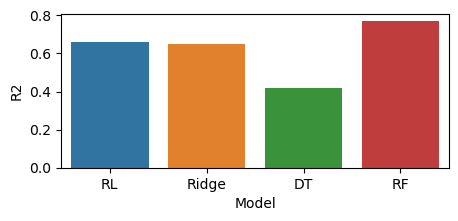

In [161]:
# Mètrica R2
plt.figure(figsize=(5,2))
sns.barplot(data = df_metrics, x = 'Model', y = 'R2');

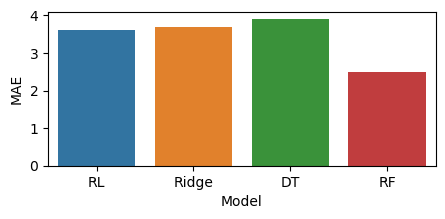

In [162]:
# Mètrica MAE
plt.figure(figsize=(5,2))
sns.barplot(data = df_metrics, x = 'Model', y = 'MAE');

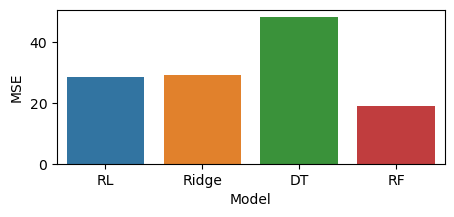

In [163]:
# Mètrica MSE
plt.figure(figsize=(5,2))
sns.barplot(data = df_metrics, x = 'Model', y = 'MSE');

In [164]:
# Mostrem el diccionari amb les llistes per cada parametre: Model, R2, MAE i MSE
data

{'Model': ['RL', 'Ridge', 'DT', 'RF'],
 'R2': [0.66, 0.65, 0.42, 0.77],
 'MAE': [3.6, 3.7, 3.9, 2.5],
 'MSE': [28.385, 29.308, 48.222, 19.051]}

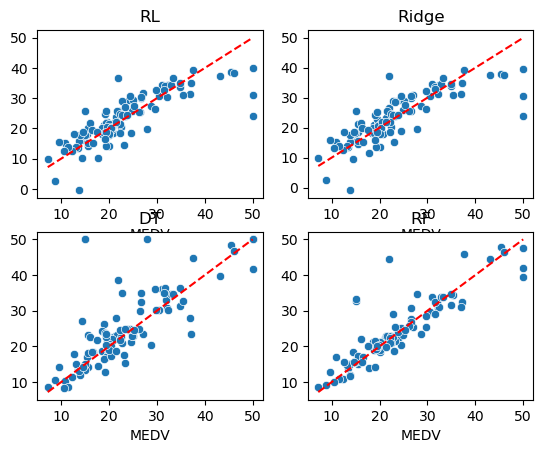

In [165]:
# sns.scatterplot dibuixa un diagrama de dispersió amb la possibilitat de diversos agrupaments semàntics.
# Representem aquest diagrames de dispersió per cadascun dels models de regressió treballats

fig, axes = plt.subplots(nrows = 2, ncols = 2)
ax = axes.flatten()

for i, (name, y_values) in enumerate(y_pred.items()):
    sns.scatterplot(y = y_values, x = y_test, ax=ax[i])
    ax[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    ax[i].set_title(f'{name}')

### Exercici 4: Compara el seu rendiment amb cross validation, emprant totes les dades.

In [168]:
# GridSearchCV fa una cerca exhaustiva sobre els valors dels paràmetres especificats per a un estimador
# Els paràmetres de l'estimador utilitzat per aplicar aquests mètodes s'optimitzen mitjançant 
# la cerca de quadrícula validada (cross-validation) creuada sobre una quadrícula de paràmetres.
from sklearn.model_selection import GridSearchCV

In [169]:
# Els paràmetres espeificats per al cas del estimador regressió lineal els mostrem usant el mètode get_params
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [171]:
# Construim la quadrícula de paràmetres per al estimador regressió lineal

lr_params = {
    'copy_X': [True, False], 
    'fit_intercept': [True, False], 
    'n_jobs': [1, -1, 2, 3], 
    'positive': [True, False]
    }

lr_grid = GridSearchCV(LinearRegression(), lr_params)


In [172]:
# Mostra la quadricula corresponent al estimador LinearRegression
lr_grid.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, -1, 2, 3], 'positive': [True, False]})

In [173]:
# Indiquem que ens mostri els millors paràmetres amb l'atribut best_params_
lr_grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [174]:
# best_score_ és un atribut que ens mostra la puntuació mitjana de la millor estimació creuada
lr_grid.best_score_

0.733993958809636

In [176]:
# Els paràmetres espeificats per al cas del estimador regressió Ridge
r_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [177]:

r_params = {
    'alpha': [0, 2, 5, 10, 30],
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False],
    'random_state': [42, 1, 123, 47, 60],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'tol': [0.00001, 0.001, 0.1, 0.5, 0.8]
    }

In [186]:
# La cerca a la quadrícula (GridSearchCV) pot buscar un gran nombre d'hiperparàmetres, 
# però pot arribar a ser computacionalment costosa a mesura que augmenta el nombre d'hiperparàmetres. 
# La cerca aleatòria (RandomizedSearchCV), d'altra banda, pot cercar un nombre més gran d'hiperparàmetres 
# sense arribar a ser massa costosa computacionalment, ja que mostra hiperparàmetres aleatòriament
# L'apliquem al estimador Ridge

from sklearn.model_selection import RandomizedSearchCV

r_grid = RandomizedSearchCV(Ridge(), r_params)
r_grid.fit(X_train, y_train)

# Marca un error que pot resoldres amb el parametre error_score='raise', però no se com emprar-lo.
# r_grid = RandomizedSearchCV(Ridge(), r_params,error_score='raise') no funciona

C:\Users\52715488V\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\52715488V\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\52715488V\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\52715488V\AppData\Loc

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': [0, 2, 5, 10, 30],
                                        'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False],
                                        'random_state': [42, 1, 123, 47, 60],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs'],
                                        'tol': [1e-05, 0.001, 0.1, 0.5, 0.8]})

In [187]:
# Cerquem els millors paràmetres de la quadricula
r_grid.best_params_

{'tol': 0.1,
 'solver': 'cholesky',
 'random_state': 123,
 'positive': False,
 'fit_intercept': False,
 'copy_X': True,
 'alpha': 10}

In [188]:
# Obtenim la millor puntuació mitjana de la millor estimació creuada per al estimador Ridge
r_grid.best_score_

0.722405928847618

In [189]:
# El comparem al obtingut anteriorment amb el estimador regressió lineal
lr_grid.best_score_

0.733993958809636

In [190]:
# Repetim ara el procediment anterior per al estimador bosc aleatori 'RandomForestRegressor'
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_params = {'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    # 'max_depth': [1, 5, 10],
    # 'max_features': [1.0, 'sqrt', 'log2', None, 5, 10],
    # 'max_leaf_nodes': [None, 1, 5, 15],
    # 'min_samples_leaf': [2, 5, 1.2, 4.5],
    # 'min_samples_split': [0, 1, 4, 10, 20.5],
    # 'min_weight_fraction_leaf': [0.5, 0.1, 1],
    # 'n_estimators': [5, 50, 100, 200, 300],
    'oob_score': [True, False],
    'random_state': [42, 1, 123, 47, 60],
    'warm_start': [True, False]}

rf_grid = GridSearchCV(RandomForestRegressor(), rf_params)

# Aquest paràmetres tarden força en executar-se

In [ ]:
rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
# Repetim ara el procediment per al estimador de regressió d'arbres de decissió 'DecisionTreeRegressor'
dt_model.get_params()

In [ ]:
dt_params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
    'splitter':['best', 'random'], 
    # 'max_depth':[1, 10, 20, 50], 
    # 'min_samples_split':[2, 3, 4], 
    # 'min_samples_leaf':[1, 2, 3], 
    # 'min_weight_fraction_leaf':[0.5, 2, 5, 10], 
    'max_features':['sqrt', 'log2'], 
    'random_state':[42, 1, 123, 47, 60], 
    # 'max_leaf_nodes':[1, 5, 15, 20], 
    # 'min_impurity_decrease':[0, 1, 4, 10, 20.5], 
    # 'ccp_alpha':[0.2, 0.5, 1, 1.5], 
    # 'monotonic_cst':[-1, 0, 1]
}

# Aquest paràmetres tarden força en executar-se

In [ ]:
# De la llibreria scikit.optimize podem importar BayesSearchCV
# La optimització bayesiana sobre hiperparàmetres BayesSearchCV implementa un mètode “fit” i “score”. 
# També implementa altres mètodes com “predict”, “predict.proba”, “decision.function”, “transform” i “inverse.transform”.
# Els paràmetres de l'estimador que s'utilitzen per aplicar aquests mètodes s'optimitzen mitjançant la cerca validada creuada
# sobre la configuració dels paràmetres.
# A diferència de GridSearchCV, no tots els valors dels paràmetres s'examinen, 
# sinó que es mostra un nombre fix de paràmetres a partir de les distribucions especificades. 
# El nombre de paràmetres que s'intenten ve donat per niter.

from skopt import BayesSearchCV

In [ ]:
dt_grid = BayesSearchCV(DecisionTreeRegressor(), dt_params)
dt_grid.fit(X_train, y_train)

In [ ]:
dt_grid.best_params_

In [ ]:
dt_grid.best_score_

In [ ]:
# Comparem les millors prediccions de cadascun dels estimadors (lr, r, rf i dt)

lr_best = lr_grid.best_estimator_
y_pred_lr_best = lr_best.predict(X_test)

r_best = r_grid.best_estimator_
y_pred_r_best = r_best.predict(X_test)

rf_best = rf_grid.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)

dt_best = dt_grid.best_estimator_
y_pred_dt_best = dt_best.predict(X_test)

In [ ]:
# Determinem els valors y_pred millors

y_pred['LR_best'] = y_pred_lr_best
y_pred['R_best'] = y_pred_r_best
y_pred['RF_best'] = y_pred_rf_best
y_pred['DT_best'] = y_pred_dt_best
y_pred['y_test'] = y_test

In [ ]:
# Obtenim les claus del diccionari y_pred
y_pred.keys()

In [ ]:
# Generem la matriu amb les millors predicions
df_pred = pd.DataFrame(y_pred)
df_pred

In [ ]:
# Una estimació de la densitat del nucli (KDE) és un mètode per a visualitzar 
# la distribució d'observacions en un conjunt de dades, anàloga a un histograma. 
# KDE representa les dades utilitzant una corba de densitat de probabilitat contínua en una o més dimensions
# mitjançant un gràfic 'KDE' que traça les distribucions univariants o bivariades utilitzant l'estimació de la densitat del nucli.

plt.figure(figsize=(10,10))
sns.kdeplot(df_pred)

In [ ]:
sns.kdeplot(df_pred[['RF', 'RF_best', 'y_test']])